# Classification -- Images & Hands-On

## Table of Contents
<ol>
    <li>Processing of complicated data like images</li>
    <li>Thinking about models to use for image classification</li>
    <li>Implementation of common models</li>
    <li>Convolutional neural networks -- an ML greatest hit</li>
</ol>

## 1. Processing of complicated data like images

#### Suppose we begin with colored 32 x 32 pixel images of objects we wish to classify.

![](cifar.png)
<span style="font-size:0.75em;">CIFAR-10 Krizhevsky et al.</span>

CIFAR-10 is a pretty standard, low-res data set for testing image classification. 

### How can we encode the information from one image?
![](corgis.png)
![](doge.png)
<span style="font-size:0.75em;">commonlounge.com; subsubroutine.com</span>

Each pixel has three dimensions, which means that its dimension is 32 x 32 x 3.

### Let's start with a simpler example

In [1]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.2.4
1.12.0


We're going to do MNIST instead of CIPHAR-10 for simplicity's and time's sake.

In [11]:
from keras.datasets import mnist
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X, y), (X_test, y_test) = mnist.load_data()

We want to know more about the data that we just loaded, so that we know what all we can do with it.

In [12]:
print(type(X))
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Next, we verify that we have images, and specifically the type of image we expect to have - just show one of the images.

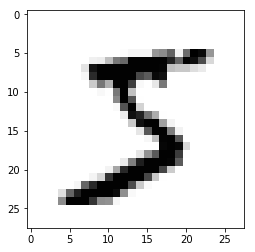

In [13]:
plt.imshow(X[0], cmap='Greys')

Now, we make sure our data makes sense - we know we have colors, so the max shoud be 255:

In [14]:
print(np.max(X_test))

255


### As long as each data point is of the same shape, we can unroll these 2- or 3-tensors into long vectors
- How many dimensions in each CIFAR-10 data point? Remember this number.

In [15]:
#Flatten each X
X = X.reshape(X.shape[0], X.shape[1] * X.shape[2])
# instead of being in a grid, all the images are now 1-D vectors. 
#We leave the first dimension alone because it functions as the list of samples. 
print(X.shape)

(60000, 784)


### Our classification output will be a vector of 0s except for the target class, which should be a 1.
### Presently our output is instead encoded as a single ordinal variable between 0 and 9.

In [16]:
y_ord = y # In case we need this later

# Encode each element of y as 10-length "one-hot vector" with binary elements
#basically, we're making an e-basis vector for each number
y = keras.utils.to_categorical(y)
print(y.shape)
print(y[0])
#So, now the y-value of our data is an indicative vector instead of a digit between 1 and 9

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Lastly, let's choose an error metric

In [17]:
def score(true, pred):
    acc = 0
    for i in range(len(true)):
        if np.sum(np.dot(true[i], pred[i])) == 1.0:
            acc += 1
    score = acc / len(true)
    return score

## 2. Thinking about models to use for image classification

### k-Nearest neighbors

* 1-Nearest Neighbors (aka nearest neighbors)
    - Use some distance metric to compare each 784-D vector to all training examples
    - Order samples by distance
    - Classify the same as the smallest distance example
* k-Nearest Neighbors
    - Classify by committee based on several small distances
    - Get a better sense of which cluster you're in
* Where do these fail?
    - When you don't get a consensus from the committee
* How do these scale with training examples?
    - scaling of n - you have to look at every single data point for every single inference you want to make - not very fast

### Logistic regression
* Optimal parameters attained from maximizing the likelihood of dataset, aka minimizing the negative log-likelihood
$$\mathcal{L}(\theta = \{W,b\},\mathcal{D}) = \sum_{i=0}^{|\mathcal{D}|} log(P(Y = y^{(i)} | x^{(i)},W,b))$$
![](log_reg.png)
    - basically, we're minimizing loss
    - After we find a function, we have to look at the errors we get, analyze the situation, and back-propogate the error and make changes
    - the probabilities are always good to keep around to see where problem data is or areas where we need more data
* "nonlinear" -- though always depends directly on weighted sums of pixels

### Random forest classifiers
* "Split" predictions based on pixels or collection of pixels
* Truly nonlinear
* Basically deductive reasoning

### Feed-forward neural networks
* Nonlinear
* Permits "communication" between pixels via dense layers
* Not super impressive, to be honest

## 3. Implementation of common models
### WAIT what haven't I done yet?

VALIDATION!!! Split out your validation set from your train and test sets.

In [18]:
#Train-val set beore model choosing
#Cross-validation would be nice, but we don't really have time to do that

X_train = X[:54000]
y_train = y[:54000]
y_ord_train = y_ord[:54000] #We're keeping this around because some of the models we're about to use prefer it

X_val = X[54000:]
y_val = y[54000:]
y_ord_val = y_ord[54000:]

### k-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
preds = model.predict(X_val[:100])
print(score(y_val[:100], preds)) #Chose only the first 100 because it'll take a really long time otherwise
#97% accuracy is pretty good! But it's still reeaaaalllllyyyyyy slow
#This isn't really training, just comparing distances - basically memorizing a bunch of vectors, which is not the same thing as ML

0.97


### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', tol=0.01, verbose=1) 
#All these parameters - don't expect to get it right (so it converges) the first time

model.fit(X_train, y_ord_train) #this one likes y_ord
preds = model.predict(X_val)

convergence after 43 epochs took 24 seconds
convergence after 41 epochs took 24 seconds
convergence after 41 epochs took 23 seconds
convergence after 53 epochs took 30 seconds
convergence after 45 epochs took 28 seconds
convergence after 48 epochs took 27 seconds
convergence after 53 epochs took 30 seconds
convergence after 47 epochs took 27 seconds
convergence after 53 epochs took 31 seconds
convergence after 47 epochs took 27 seconds


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.5min finished


In [21]:
# Create equivalent accuracy score for ordinal outputs
def score_ord(true, preds):
    acc = 0
    for i in range(len(true)):
        if true[i] == preds[i]:
            acc += 1
    score = acc / len(true)
    return score

In [22]:
print(score_ord(y_ord_val,preds))
#93% accuracy
#vvvvvvvveeeeeeeeeeeeeeeeeeerrrrrrrrrrrrrrrrryyyyyyyyyyyyyyyyyyyyyyyyyyyyy slow - sun at own risk

0.931


### Random forest classifiers - you try

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() #normally, you'd want to 
model.fit(X_train, y_train)
preds = model.predict(X_val)
print(score(y_val, preds))
#87% accuracy - not great
#That's why you mess with parameters

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8785


### Feed-forward neural networks

In [25]:
from sklearn.neural_network import MLPClassifier
#The Classifier has a little more stuff than just the regressor
#Remember that sklearn is mostly good for quickly choosing your model
model = MLPClassifier(hidden_layer_sizes=(100,50,20))
model.fit(X_train, y_train)
preds = model.predict(X_val)
print(score(y_val, preds))
#97% accuracy - up there with k-nearest neighbors
#Inference time is a lot better for neural networks

0.9708333333333333


## 4. Convolutional neural networks

![](conv_net.png)
<span style="font-size:0.75em;">easy-tensorflow.com</span>


We want a more intelligent system than just densely propogating everything. Convolutional neural networks take how our brains work more into account. Basically, we're looking for individual features - lines, curves, edges, etc. The filter gets dragged across the image and looks for what it wants, multiplying pixels elementwise and doing other operations to get a number that represents the value of what the filter is looking for in that image. That's called a convolution. We do a ton of those with a ton of different filters to create a bunch of different feature maps. Then we repeat, and each successive feature map gets more and more macroscopic, eventually recognizing the entire image (hopefully). The pooling layers reduce the dimensionality so that we don't get overwhelmed. At the end, hopefully we have something with all of the information about the image. When we think we have enough feature maps, we flatten it out and do a dense connection just like we were doing before. If we have conditioned the huge number of weights well enough, it will be accurate. 

Basically, it's looking at areas of the image, instead of each pixel individually. 

https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05

* Generally, a <i>filter</i> is a rectangular $k \times l$ matrix of weights.
* A single <i>filter</i> traverses an image, elementwise multiplying pixels in its range, adding, and performing a nonlinearity.
* The new <i>feature map</i> generated is typically the same size or smaller than the input.
* Many <i>feature maps</i> are generated with different <i>filters</i>, each with different weights
* <i>Pooling layers</i> serve to reduce feature map dimensionality.
* The CNN concludes with generic Dense layers

### Examines local areas of photographs -- takes full photo matrix as input, not flattened

In [26]:
#You don't even have to flatten it out! 
(X, y), (X_test, y_test) = mnist.load_data()
y_train = keras.utils.to_categorical(y)
y_test = keras.utils.to_categorical(y_test)

### Suppose I have validated the following hyperparameters such that I believe they are optimal. <i>Now</i> we can test.

In [28]:
# Choose train and test, add an additional 1 rank to indicate
# greyscale for special layers

X_train = X.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
#Using test because we're going to pretend that we've already built and validated it and we're ready to test.

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten

model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
#Coresponds to the flat grey blocks in the picture above

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=1)

#Not going to enter and you probably shouldn't either - this is a recreation of state of the art framework, and it takes about 2 hours to run
# When you consider the number of hyperparameters involoved, you can see how optimizing this would be an actual nightmare
# Though, in the world of data science, 2 hours is really not that bad. 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
60000/60000 [==============================] - 227s 4ms/step - loss: 0.2564 - acc: 0.9220
Epoch 2/25
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0658 - acc: 0.9803
Epoch 3/25
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0503 - acc: 0.9848
Epoch 4/25
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0414 - acc: 0.9872
Epoch 5/25
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0352 - acc: 0.9890
Epoch 6/25
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0328 - acc: 0.9900
Epoch 7/25
60000/60000 [==============================] - 231s 4ms/step - loss: 0.0276 - acc: 0.9916
Epoch 8/25
60000/60000 [==============================] - 

![](KaggleMNIST.png)
<span style="font-size:0.75em;">Kaggle - Chris Deotte 2018</span>

In [22]:
preds = model.predict(X_test)
final = np.zeros_like(preds)
final[np.arange(len(preds)), preds.argmax(1)] = 1

print(score(y_test, final))
#99.53% output - that's pretty good - 1 in 200 is wrong

0.9953


In [23]:
model.save("nice_cnn.h5")
#The convolutional neural networks become more important with more intense data sets
# It's very hard, if not impossible, to get good accuracy with KNN on something like CIPHAR-10

### A word on inductive bias and domain knowledge
* CNNs take advantage of our understanding of local features in mapping images to semantic meaning (number labels, dog/cat/plane)
* "A universal function approximator": The infinitely large dense NN can fit any analytic function exactly with enough data.
    - "Not really": We rarely have "enough data" and can't train infinitely large NNs
    - The name of the game is making the network size and data requirements <i>practical</i>
* The state of the art usually comes from understanding your problem first